<a href="https://colab.research.google.com/github/madachy/sd_incose/blob/master/Target_Shooter_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Target Shooter System

Run the cell below once at the beginning of each session. The output can then be cleared. There is also a method to permanently install se-lib to eliminate this step.

In [ ]:
!pip install se-lib

from selib import *

In [ ]:
# target shooter system requirements

target_destruction_time = 2


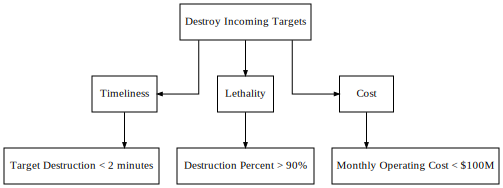

In [ ]:
requirements = [("Destroy Incoming Targets", "Timeliness"),
                ("Destroy Incoming Targets", "Lethality"),
                 ("Destroy Incoming Targets", "Cost"),
                  ("Timeliness", f"Target Destruction < {target_destruction_time} minutes"),
               ("Lethality", "Destruction Percent > 90%"),
               ("Cost", "Monthly Operating Cost < $100M"),
                 ]
tree(requirements)

In [ ]:
# target shooter system parameters

num_shooters = 1
weapons_technology = "High"
if weapons_technology == "High": shooting_time = 'np.random.normal(.8, .2)'
if weapons_technology == "Normal": shooting_time = 'np.random.normal(1, .3)'

num_targets = 100

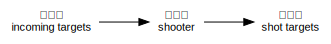

In [ ]:
# target shooter system

num_shooters = 1
weapons_technology = "High"
if weapons_technology == "High": shooting_time = 'np.random.normal(.8, .2)'
if weapons_technology == "Normal": shooting_time = 'np.random.normal(1, .3)'

init_de_model()
add_source('incoming targets',
           entity_name="target",
           num_entities = num_targets,
           connections={'shooter': 1},
           interarrival_time='np.random.exponential(3)')

add_server(name='shooter',
           connections={'shot targets': 1},
           service_time=shooting_time,
           capacity = num_shooters)

add_terminate('shot targets')

draw_model_diagram(filename="target_shooter_model_diagram", format='svg')

In [ ]:
model_data, target_entity_data = run_model()
print(model_data)
print(target_entity_data)

def calculate_time_difference(simulation_output):
    time_differences = {}
    for entity, data in simulation_output.items():
        time_differences[entity] = data['departure'] - data['arrival']
    return time_differences

time_differences = calculate_time_difference(target_entity_data)
# Calculate the percentage of time differences less than 2
count = sum(1 for time in time_differences if time_differences[time] < 1.2)
percentage = count / len(time_differences) * 100

print(f'{target_entity_data =}')
# Print the percentage
print(f"The percentage of time differences less than 2 is {percentage:.2f}%")

2.2169848917395027: target 1 entered from incoming targets
2.2169848917395027: target 1 incoming targets -> shooter
2.2169848917395027: target 1 requesting shooter resource 
2.2169848917395027: target 1 granted shooter resource waiting time 0.0
2.843965377653703: target 1 completed using shooter resource with service time 0.6269804859141999
2.843965377653703: target 1 shooter -> shot targets
2.843965377653703: target 1 leaving system at shot targets 
4.458112139707781: target 2 entered from incoming targets
4.458112139707781: target 2 incoming targets -> shooter
4.458112139707781: target 2 requesting shooter resource 
4.458112139707781: target 2 granted shooter resource waiting time 0.0
4.9113318875932785: target 2 completed using shooter resource with service time 0.45321974788549746
4.9113318875932785: target 2 shooter -> shot targets
4.9113318875932785: target 2 leaving system at shot targets 
10.041069951529488: target 3 entered from incoming targets
10.041069951529488: target 3 in

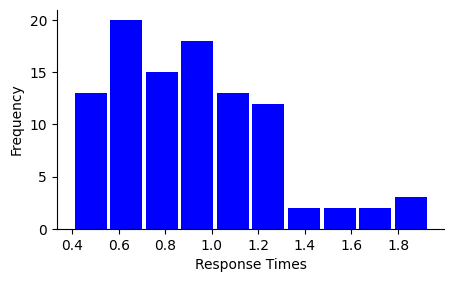

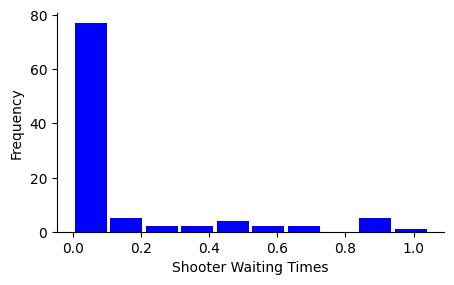

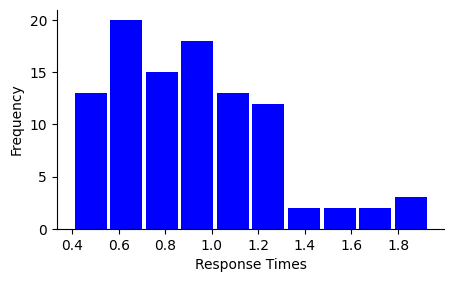

In [ ]:
plot_histogram(model_data['shooter']['waiting_times'], xlabel="Shooter Waiting Times")
plot_histogram(time_differences.values(), xlabel="Response Times")

In [ ]:
time_differences

{1: 0.6269804859142001,
 2: 0.45321974788549735,
 3: 1.0047851086377602,
 4: 0.9416972472472693,
 5: 0.5428193114269284,
 6: 0.7382944327115446,
 7: 1.0033236393318816,
 8: 0.9538969972695739,
 9: 1.093112618843243,
 10: 1.0752074736933253,
 11: 0.9735397526497422,
 12: 0.6386222472666674,
 13: 0.894307247884889,
 14: 0.9163996058008053,
 15: 0.874982905226382,
 16: 0.6964058467740983,
 17: 0.8753732457499268,
 18: 1.2979134888429087,
 19: 1.5100241944697217,
 20: 1.3062822161264904,
 21: 0.5071788747256818,
 22: 0.8638374490481198,
 23: 1.8718792741068881,
 24: 0.9085858844419903,
 25: 0.8502530726509434,
 26: 0.4028509520542656,
 27: 1.238617549200569,
 28: 1.2304828159534793,
 29: 0.8253057586586436,
 30: 1.0329888143762247,
 31: 0.8347703742579711,
 32: 1.0161673186510853,
 33: 1.4207957739130705,
 34: 1.1313816224335511,
 35: 0.579931336281291,
 36: 0.5265318408038127,
 37: 0.40663979277273654,
 38: 1.097115650855045,
 39: 0.6058039327767517,
 40: 0.8529467769506311,
 41: 0.782799

## Monte Carlo Simulation and Output Analysis

In [ ]:
# Target Shooter System Monte Carlo Simulation and Output Analysis

import numpy as np

# evaluate measure of performance to attain objective mean response time < 2
mean_response_times = []

response_times_dict={}

weapons_technology = "High"

for num_shooters in [1, 2]:
    for run in range(10):
        response_times = []

        if weapons_technology == "High": shooting_time = 'np.random.normal(.8, .2)'
        if weapons_technology == "Normal": shooting_time = 'np.random.normal(1, .3)'

        init_de_model()
        add_source('incoming targets',
                entity_name="target",
                num_entities = 10,
                connections={'shooter': 1},
                interarrival_time='np.random.exponential(3)')

        add_server(name='shooter',
                connections={'shot targets': 1},
                service_time='np.random.normal(1, .3)',
                capacity = num_shooters)

        add_terminate('shot targets')

        model_data, target_entity_data = run_model(verbose=False)

        response_times = [target['departure'] - target['arrival'] for target in target_entity_data.values()]
        """
        for data in target_entity_data.values():
            response_time = data['departure'] - data['arrival']
            response_times.append(response_time)
        """

        # Calculate the percentage of response times less than 2
        count = sum(1 for time in response_times if time < 1.2)
        percentage = count / len(response_times) * 100

        mean_response_times.append(np.mean(response_times))
        response_times_dict[num_shooters] = mean_response_times

mean_response_times
response_times_dict

ValueError: ignored

In [ ]:
# Target Shooter System Monte Carlo Simulation and Output Analysis

import numpy as np

# evaluate measure of performance to attain objective mean response time < 2

response_times_dict={}


num_shooters = 1

scenarios = [{'weapons_technology': weapons_technology, 'num_shooters': num_shooters} for weapons_technology in ["Normal", "High"] for num_shooters in [1,2]]

for scenario in scenarios:
    mean_response_times = []
    response_time_goal_attainment_percent = []
    response_times_dict
    for run in range(30):
        print(scenario)
        response_times = []

        if scenario['weapons_technology'] == "High": shooting_time = 'np.random.normal(.8, .2)'
        if scenario['weapons_technology'] == "Normal": shooting_time = 'np.random.normal(1, .3)'

        init_de_model()
        add_source('incoming targets',
                entity_name="target",
                num_entities = 10,
                connections={'shooter': 1},
                interarrival_time='np.random.exponential(3)')

        add_server(name='shooter',
                connections={'shot targets': 1},
                service_time=shooting_time,
                capacity = num_shooters)

        add_terminate('shot targets')

        model_data, target_entity_data = run_model(verbose=False)

        response_times = [target['departure'] - target['arrival'] for target in target_entity_data.values()]

        # Calculate the percentage of response times less than 2
        count = sum(1 for time in response_times if time < 1.2)
        percentage = count / len(response_times) * 100
        response_time_goal_attainment_percent.append(percentage)

        mean_response_times.append(np.mean(response_times))
        response_times_dict[(scenario['weapons_technology'], scenario['num_shooters'])] = mean_response_times

response_time_goal_attainment_percent
mean_response_times
response_times_dict

In [ ]:
response_time_goal_attainment_percent
mean_response_times
response_times_dict

### Response Times

In [ ]:
import matplotlib.pyplot as plt
# boxplots

#data_lists = normal_1_response_times, high_1_response_times, normal_2_response_times, high_2_response_times

data_lists = response_times_dict[('Normal', 1)], response_times_dict[('High', 1)], response_times_dict[('Normal', 2)], response_times_dict[('High', 2)]  

figure, axis1 = plt.subplots()
#axis1.set_ylim([40, 90])
axis1.set_title('response_times')
axis1.set_xlabel('Weapons Technology, Number of Shooters')
axis1.set_ylabel('Response Time')
axis1.boxplot(data_lists, widths=0.15, vert=True, patch_artist=True)
axis1.set(xticklabels = ['Normal, 1', 'High, 1', 'Normal, 2', 'High, 2'])

plt.tight_layout()
plt.show()

KeyError: ignored

In [ ]:
target_entity_data


In [ ]:
model_data

In [ ]:
np.mean(response_times_dict[('Normal', 1)])

### Cost Effectiveness

In [ ]:
# interaction plots
weapon_technology = [1, 2, 1, 2] # normal, high, normal, high
number_shooters = [1, 1, 2, 2]
mean_response_time = [np.mean(response_times_dict[('Normal', 1)]), np.mean(response_times_dict[('High', 1)]), np.mean(response_times_dict[('Normal', 2)]), np.mean(response_times_dict[('High', 2)])]

system_effectiveness = [1/response_time for response_time in mean_response_time]
print(f'{system_effectiveness=}')

costs = [100, 150, 125, 175]

relative_costs = [cost/100 for cost in costs]

cost_effectiveness = [se/cost for se, cost in zip(system_effectiveness, costs)]
print(f'{cost_effectiveness=}')

import matplotlib.pyplot as plt

fig, axis = plt.subplots()
axis.scatter(relative_costs, system_effectiveness, color='red') 
axis.set(xlabel = "Relative Cost", ylabel='System Effectiveness',)
plt.show()

fig, axis = plt.subplots()
axis.scatter([1, 2, 3, 4], cost_effectiveness, color='red') 
axis.set(xlabel = "System Option", ylabel='Cost Effectiveness', ylim=(0, .01), xticks=[1, 2, 3, 4], xticklabels=["Normal, 1", "Normal, 2", "High. 1", "High, 2"]) # yticklabels=[None]*6
plt.show()